In [1]:
import pandas as pd 
import geopandas as gpd

import configparser 
import sqlalchemy

CONFIG = "sample_config.cfg"
ENGINE = "engine"
URL = "url"
PORT = "port"
USERNAME = "db_username"
PASSWORD = "password"
DBNAME = "db_name"
DRIVER = "driver" 
FSTR_POSTGIS_CONNECT = f"{{{ENGINE}}}://{{{USERNAME}}}:{{{PASSWORD}}}@{{{URL}}}:{{{PORT}}}/{{{DBNAME}}}"
config = configparser.ConfigParser()
config.read(CONFIG)

engine = sqlalchemy.create_engine(FSTR_POSTGIS_CONNECT.format(**config["postgis"]), echo=False)

# In 1 hour around the world of spatial data

What are we going to talk about? 
- Spatial data 101 
- Spatial data wrangling 
- Use cases 

What are we **not** going to talk about? 
- GIS systems 
- Spatial data science 
- Advanced stuff (network analysis, routing) 

# Introduction: What is spatial data? 

Data associated with spatial component - objects referencing position on the earth's surface. 

Spatial data consists of a spatial information (**where**), attributes (**what**) and sometimes temporal information (**when**).

Examples: 
- satellite imagery 
- topography
- power lines, cables, substations 
- exercise tracking (e.g. running, biking)

# Types of spatial data

Depending on the use case geographic data can be represented in two ways: 

- raster data (grid)
 
![RasterData](./imgs/raster.PNG)

- vector data (point representation) 

![Vector Data](./imgs/vector.PNG)

## Raster representation

Geographic space is divided into cells. 

Each cell is geographically located and receives attributes or properties. 

Often generated from satellite or flyover sensor data.

Formats: .jpg, .png, .tiff

![Raster_Example](imgs/raster_example.PNG)


## Vector representation

Points with X, Y, (Z) - coordinates which can be connected to more complex geometric types like Polygons or Lines. 

Examples: Shapefile (.shp), GeoJSON (.geojson), GeoPackage (.gpkg)

![Vector Example](imgs/vector_example.png)


In [5]:
gdf_substations = gpd.read_file("data/substation.geojson")
gdf_substations.sample(20)

,osm_id,category,longitude,latitude,city,geometry
386,node/6310881189,substation,7.000345,51.388091,Essen,POINT (360865.054 5694880.986)
99,node/1251811580,substation,7.083524,51.445307,Essen,POINT (366818.497 5701088.737)
246,node/3805700299,substation,6.981876,51.456800,Essen,POINT (359790.533 5702556.398)
442,node/9319154501,substation,7.025626,51.450980,Essen,POINT (362812.337 5701826.395)
457,way/59925390,substation,6.996070,51.514257,Essen,"POLYGON ((360704.497 5708993.154, 361040.214 5..."
424,node/7880732562,substation,7.098473,51.447314,Essen,POINT (367863.063 5701284.848)
516,way/422075523,substation,7.014370,51.460608,Essen,"POLYGON ((362054.324 5702924.205, 362063.536 5..."
83,node/837693800,substation,7.037883,51.454251,Essen,POINT (363673.711 5702167.278)
389,node/6370454785,substation,7.010086,51.399231,Essen,POINT (361576.340 5696101.372)
343,node/4902669563,substation,6.949137,51.362595,Essen,POINT (357222.990 5692144.451)


# Geometric Data Types

![Data Types](imgs/getting-started-with-postgis.jpg) 


[Multipolygons](https://www.openstreetmap.org/relation/89605) can consist of (combinations of) outer rings and interior rings (holes).



Multiple {Points,LineStrings,Polygons} can be collected together in
Multi{Points,LineStrings,Polygons}

Even Heterogeneous collections are possible
`GEOMETRYCOLLECTION()`

Note: Geometry Columns can be of a specific type
or of type `GEOMETRY` with heterogeneous
geometries

# Projections and coordinate reference systems

## Coordinate and Spatial Reference System

The earth is a .... ? 

<img src="imgs/geoid.png" alt="Projections" width="400"/>

## Projections 
**Problem**: Sphere cannot be projected to a 2D-surface without some kind of distortion

<img src="imgs/spatial_projections.png" alt="Projections" width="500"/>

Coordinate reference system (CRS) = elipsoid + coordinate system (e.g. units)

Spatial reference system (SRS) = CRS + projection 

CRS are referenced by unique **EPSG-Codes** 
    

Most common coordinate Reference Systems: 
- [World Geodetic System 1984, EPSG:4326](https://epsg.io/4326)
- [Gauß-Krüger, EPSG:31467](https://epsg.io/31467)
- [Universal Transverse Mercator (UTM), EPSG:25832](https://epsg.io/25832)  
- [Lambert Projection, EPSG:3035](https://epsg.io/3035)
    

Competing qualitative properties: 
 - Measurement (equidistant and/or equal area)
 - Shape (angular conformity)
 - Direction (Is north really north?, Is a straight line the shortest distance between two point?)
 - Range of area supported (only locally applicable?)
 

![Mercator size disparity](imgs/mercator-vs-true-world-map-true-coutry-size.gif)

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/World-airline-routemap-2009.png" alt="Projections" width="800"/>

**Cartesian Coordinate** Reference Systems: 

Advantages: 
- meaningful values for distances, areas and volumes
- more efficient distance computation

Disadvantages: 
- only work for a supported area 

# Spatial data wrangling

## [Geopandas](https://geopandas.org/en/stable/docs/user_guide/io.html])
 
<img src="imgs//geopandas_logo.png" alt="Projections" width="400"/>


Extension of Pandas for geometric data: 
- geometric datatypes
- spatial indexing/ spatial joins
- geometric functions

In [7]:
gdf_substations = gpd.read_file("./data/substation.geojson")

In [8]:
gdf_substations.head()

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (359452.903 5703142.979)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (359719.633 5702918.616)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (359381.216 5702888.333)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (359451.825 5703060.693)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (364072.695 5699852.410)


In [9]:
gdf_substations.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°E to 12°E and ETRS89 by country
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
gdf_substations.to_crs("EPSG:4326")

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (6.97679 51.46199)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (6.98071 51.46004)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (6.97586 51.45968)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (6.97680 51.46125)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (7.04451 51.43354)
...,...,...,...,...,...,...
533,way/857128804,substation,6.988020,51.514559,Essen,"POLYGON ((6.98816 51.51487, 6.98840 51.51478, ..."
534,way/891363605,substation,7.065062,51.410293,Essen,"POLYGON ((7.06508 51.41027, 7.06503 51.41028, ..."
535,way/917572339,substation,7.126413,51.446264,Essen,"POLYGON ((7.12753 51.44697, 7.12787 51.44663, ..."
536,way/962292346,substation,7.086280,51.476096,Essen,"POLYGON ((7.08626 51.47606, 7.08625 51.47612, ..."


<AxesSubplot:>

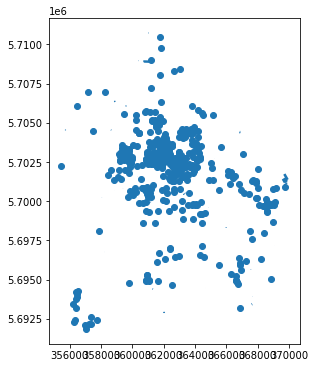

In [11]:
gdf_substations.plot(figsize=(6, 6))

## [PostGis](https://postgis.net/)

<img src="imgs//postgis-logo.png" alt="Projections" width="200"/>


Extension of PostGres for spatial data: 
- geometric datatypes
- spatial indexing 
- array of spatial functions `ST_<something>`

Install with SQL command
```
CREATE EXTENSION postgis;
-- enable raster support (for 3+)
CREATE EXTENSION postgis_raster;
```

## Interaction between PostGis and geopandas

In [12]:
# reading from postgis 
gdf = gpd.read_postgis(con=engine, sql="select * from deep_dive.substation", geom_col="geometry")
gdf.head()

,osm_id,category,longitude,latitude,city,geometry
0,node/305990337,substation,6.976786,51.461987,Essen,POINT (359452.903 5703142.979)
1,node/305990706,substation,6.980712,51.460037,Essen,POINT (359719.633 5702918.616)
2,node/305997283,substation,6.975856,51.459681,Essen,POINT (359381.216 5702888.333)
3,node/305997300,substation,6.976803,51.461247,Essen,POINT (359451.825 5703060.693)
4,node/308525558,substation,7.044511,51.433544,Essen,POINT (364072.695 5699852.410)


In [13]:
# writing to postgis 
gdf.to_postgis(con=engine, name="sample_substations", schema="deep_dive", if_exists="replace")

## Example spatial functions

- `ST_Area(geometry g1)` 
- `ST_Translate(geometry g1, float deltax, float deltay)`
- `ST_Rotate(geometry geomA, float rotRadians)`
- `ST_Length(geometry g1)`
- `ST_Distance(geometry A, geometry B)`

## Spatial Relationships

Spatial databases have the ability to compare relationships between geometries: 
- Equality                 `ST_EQUAL(geometry A, geometry B)`
- Intersection `ST_INTERSECTS(geometry A, geometry B)`
- Overlaps `ST_OVERLAPS(geometry A, geometry B)`
- Within/Contains `ST_WITHIN(geometry A, geometry B)` and `ST_CONTAINS(geometry A, geometry B)`
- Distance queries  `ST_DWithin(geometry A, geometry B, max_distance)`

Example questions that could be answered with spatial relationship queries: 
- Which charging stations are in the vicinity of Points-of-Interest? 
- Which power lines cross highways or rivers? 
- Which buildings are inside nature reserves? 
- Append Postal Code/ Country Code/ AGS by spatial intersection

Dimensionally Extended 9-Intersection Mode 

[DE9IM: Even more complex Model for spatial interaction between two objects](https://postgis.net/workshops/postgis-intro/de9im.html)

![DE9IM](imgs/de9im3.jpg)

## Spatial Indices

Makes answering questions like 
- is X **inside of** Y 
- does X **intersect** Y 
- is X **near** Y 

go from 🐌 to 🚀!

On a high level spatial indices work by: 
1. representing objects by **2D-bounding boxes** (4 values regardless of geometry)
2. making spatial comparisons between bounding boxes (**cheap!**) 
3. reserving expensive (but accurate) comparisons between **matched bounding boxes**  

![Simple Example Spatial Index](imgs/bbox.png)

The most commonly used spatial index is R-Tree:

![RTree](./imgs/spatial_index.png)

Syntax for creating R-Tree index on geometry column: 

`CREATE INDEX <name_index> ON <table_name> USING GIST (<geometry_column>);`

Spatial relationship functions like 
- `ST_INTERSECTS`,
- `ST_OVERLAPS`,
- `ST_WITHIN` 
- or `ST_DWithin` 

leverage spatial indices for computation

## Spatial Joins and neighbor searches

Spatial Join is the bread-and-butter of any spatial analysis.

Instead of join-keys the spatial relationships are used as join keys. 

Pseudo Code Spatial Join: 
```
SELECT
    id_loc,
    id_other_loc
FROM locations
JOIN other_locations
WHERE ST_INTERSECTS(geom_loc, geom_other_loc)
```

### Example: Which highways cross rivers? 

In [12]:
SQL = """select 
            h.osm_id as id_highway, 
            h.geometry 
         from deep_dive.highway h
         inner join deep_dive.waterway w
         ON ST_INTERSECTS(h.geometry, w.geometry)
         and h.highway in ('motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential')
    """
gdf = gpd.read_postgis(con=engine, sql=SQL, geom_col="geometry")

In [13]:
gdf.head()

,id_highway,geometry
0,way/24595082,"LINESTRING (360766.936 5694754.658, 360780.146..."
1,way/323541564,"LINESTRING (360792.254 5694776.667, 360780.019..."
2,way/23039501,"LINESTRING (356234.508 5691929.533, 356247.504..."
3,way/28476033,"LINESTRING (355917.034 5691493.985, 355921.733..."
4,way/28081652,"LINESTRING (358015.632 5702685.405, 358028.830..."


In [14]:
gdf.shape

(157, 2)

### Example: Which buildings are inside retail areas? 

In [20]:
SQL = """select 
            b.osm_id as id_building, 
            b.geometry 
         from deep_dive.building b
         inner join deep_dive.landuse l
         ON ST_WITHIN(b.geometry, l.geometry) and l.landuse = 'retail' 
    """
gdf = gpd.read_postgis(con=engine, sql=SQL, geom_col="geometry")

In [21]:
gdf.head()

,id_building,geometry
0,way/82459610,"POLYGON ((362634.600 5698309.564, 362643.250 5..."
1,way/82459611,"POLYGON ((362625.437 5698320.916, 362622.370 5..."
2,way/82459614,"POLYGON ((362682.587 5698396.536, 362684.479 5..."
3,way/82459617,"POLYGON ((362654.779 5698300.307, 362646.772 5..."
4,way/82459618,"POLYGON ((362681.181 5698346.176, 362689.797 5..."


In [22]:
gdf.shape

(927, 2)

### Which objects are near other objects? 

#### Naive approach: 

```
SELECT
    id_loc,
    id_other_loc
FROM locations, other_locations
ORDER BY ST_Distance(geom_loc, geom_other_loc) 
LIMIT 1
```

#### Simple Distance Query

Use `ST_DWithin` Function

``` 
    SELECT 
        id_loc 
    FROM locations 
    WHERE ST_DWithin(geom_loc, 'SRID=25832;POINT(595603.854 5703496.257)'::geometry, 100)
``` 

Example Query nearest neighbor: 

`geom_a <-> geom_b` — Returns the 2D distance between geometry A and geometry B.


``` 
    SELECT 
        id_loc
    FROM locations 
    ORDER BY geom_loc <-> 'SRID=25832;POINT(595603.854 5703496.257)'::geometry
    LIMIT 1
``` 

Most common use case: Distance query between two tables containing geometries

use PostGres equivalent of for each loop: `CROSS JOIN LATERAL`

```
  SELECT  
      id_loc 
      id_other_loc
  FROM locations
  CROSS JOIN LATERAL ( 
          SELECT 
              id_other_loc
           FROM other_locations 
           WHERE ST_DWITHIN(geom_loc, geom_other_loc, 100)
    ) subq
```


### Neighbor Query between two tables:

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    --ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance)
) subq
```

### Spatial Query between with distance filter:

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance) --spatial index is used
) subq
```

### Spatial Query with limiting the number of neighbors

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    ORDER BY geom_loc <-> geom_other_loc --spatial index is used
    LIMIT 1
) subq
```

### Spatial Query with distance filter and limiting the number of neighbors

```
SELECT
    id_loc,
    geom_loc, 
    id_other_loc, 
    geom_other_loc, 
    ST_Distance(geom_loc, geom_other_loc) as distance_m
FROM locations
CROSS JOIN LATERAL (
    SELECT 
        id_loc, 
        geom_other_loc
    FROM other_locations
    WHERE ST_DWithin(geom_loc, geom_other_loc, max_distance) --spatial index is used
    ORDER BY geom_loc <-> geom_other_loc --spatial index is used
    LIMIT 1
) subq
```

# Use cases: 

## Which substations are at risk of flooding? 

In [25]:
#see distance query substation - waterway in spatial_queries.sql 

## Which fire department will put the fire out at my house? 

In [24]:
#see  fire stations and buildings query in spatial_queries.sql 

## Spatial clustering (Tableau and Postgis)

In [23]:
# see example spatial clustering in spatial_queries.sql

## Where can I build my house? (WIP)

# Spatial technology stack (Python)
- Data Wrangling: 
    - geopandas (pandas extension for geometric data)
    - pyproj (geographic reference systems)
    - fiona (file I/0)
    - rtree (spatial indexing) 
    - pygeos (spatial indexing)
    - shapely (geometry data)
    - scipy/scikitlean (neighbor-searches) 
    - networkx (network analysis)

 
- Plotting: 
    - matplotlib (+ descartes) 
    - folium (Python leaflet wrapper) 
    - altair (interactive declarative visualizations) 
    - datashader (plotting extremely large datasets) 
 
 
- Misc: 
    - osmnx, osmium (OpenStreetMap data)

# References & Acknowledgements

- https://github.com/martinchristen/bigdatabbq2021
- [PostGis Feature Overview](https://www.youtube.com/watch?v=g4DgAVCmiDE)
- [Introduction to Spatial Indexing](https://blog.crunchydata.com/blog/the-many-spatial-indexes-of-postgis)
- [PostGiS Day 2021](https://www.youtube.com/playlist?list=PLesw5jpZchudjKjwvFks-gAbz9ZZzysFm)
- [PostGiS in Action](https://www.manning.com/books/postgis-in-action-third-edition)
- [Geopandas Tutorial](https://automating-gis-processes.github.io/site/notebooks/L3/spatial_index.html)
